In [1]:
# path 설정
import sys
sys.path.append('/Users/jtchoi/Library/CloudStorage/GoogleDrive-jungtaek0227@gmail.com/My Drive/quant/Quant-Project/quant/')

# 제작한 모듈들 임포트
from price.price_processing import *
from strategy.factors.Momentum import MomentumFactor
from strategy.optimize.CrossSectional import *
from strategy.optimize.TimeSeries import *

# S&P500에 속한 기업들 티커를 받기 위한 모듈 임포트
import bs4 as bs
import requests
import yfinance as yf
import datetime

# 기타 모듈 임포트
import matplotlib.pyplot as plt
from collections import Counter
import datetime as dt
import seaborn as sns
sns.set()

In [2]:
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
etf = yf.Tickers(tickers)
data = etf.history(start='2010-01-01', actions=False)
data.drop(['Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)
price_universe = data.droplevel(0, axis=1).resample('M').last()
price_universe.index = pd.to_datetime(pd.to_datetime(price_universe.index).date)
price_universe.index.name = 'date_time'
price_universe

[*********************100%***********************]  9 of 9 completed


,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
date_time,,,,,,,,,
2010-01-31,22.680122,35.657681,9.105053,21.240721,17.287270,18.476988,18.646770,25.047731,24.384764
2010-02-28,23.703508,36.730698,9.426110,22.373360,17.889357,19.062330,18.400492,25.143818,25.742756
2010-03-31,25.579924,37.765358,10.264928,24.318270,19.112949,19.780487,18.895575,25.814508,27.752457
2010-04-30,25.632711,39.334526,10.400075,25.353586,19.352894,19.568024,19.392492,24.810209,29.425718
2010-05-31,23.189339,34.830536,9.447596,23.041634,17.904943,18.661503,18.322214,23.195292,27.355272
...,...,...,...,...,...,...,...,...,...
2022-09-30,67.572250,71.285797,30.170815,82.446487,118.439911,66.254890,64.978340,120.613159,142.060654
2022-10-31,73.603188,89.082504,33.768257,93.901810,127.503891,72.222092,66.238029,132.205399,143.636337
2022-11-30,82.217377,90.220779,36.083736,101.236809,135.570724,76.640411,70.850288,138.449692,145.770493


In [3]:
#price_universe = add_cash(price_universe, 252, 0.04)

In [4]:
target_rebal = rebal_dates(price_universe, 'month')
target_rebal

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31', '2023-01-31'],
              dtype='datetime64[ns]', length=157, freq=None)

In [5]:
rebal_price_df = price_on_rebal(price_universe, target_rebal)
rebal_price_df

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
2010-01-31,22.680122,35.657681,9.105053,21.240721,17.287270,18.476988,18.646770,25.047731,24.384764
2010-02-28,23.703508,36.730698,9.426110,22.373360,17.889357,19.062330,18.400492,25.143818,25.742756
2010-03-31,25.579924,37.765358,10.264928,24.318270,19.112949,19.780487,18.895575,25.814508,27.752457
2010-04-30,25.632711,39.334526,10.400075,25.353586,19.352894,19.568024,19.392492,24.810209,29.425718
2010-05-31,23.189339,34.830536,9.447596,23.041634,17.904943,18.661503,18.322214,23.195292,27.355272
...,...,...,...,...,...,...,...,...,...
2022-09-30,67.572250,71.285797,30.170815,82.446487,118.439911,66.254890,64.978340,120.613159,142.060654
2022-10-31,73.603188,89.082504,33.768257,93.901810,127.503891,72.222092,66.238029,132.205399,143.636337
2022-11-30,82.217377,90.220779,36.083736,101.236809,135.570724,76.640411,70.850288,138.449692,145.770493
2022-12-31,77.680000,87.470001,34.200001,98.209999,124.440002,74.550003,70.500000,135.850006,129.160004


In [6]:
test_mt_factor = MomentumFactor(rebal_price=rebal_price_df, lookback_window=1, n_sel=3)
test_rel_signal = test_mt_factor.relative_momentum()
display(test_rel_signal)

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
2010-02-28,1,0,0,1,0,0,0,0,1
2010-03-31,1,0,1,1,0,0,0,0,0
2010-04-30,0,1,0,1,0,0,0,0,1
2010-05-31,0,0,0,0,0,1,1,1,0
2010-06-30,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...
2022-09-30,0,0,1,0,0,1,0,1,0
2022-10-31,0,1,1,1,0,0,0,0,0
2022-11-30,1,0,0,1,0,0,1,0,0
2022-12-31,0,0,0,0,0,1,1,1,0


In [7]:
cs_weight = Equalizer(signal=test_rel_signal, rebal_price=rebal_price_df, param=12)
beta_weight = cs_weight.beta()
ew_weight = cs_weight.ew()

In [8]:
ew_weight = ew_weight.fillna(0)

<AxesSubplot: xlabel='date_time'>

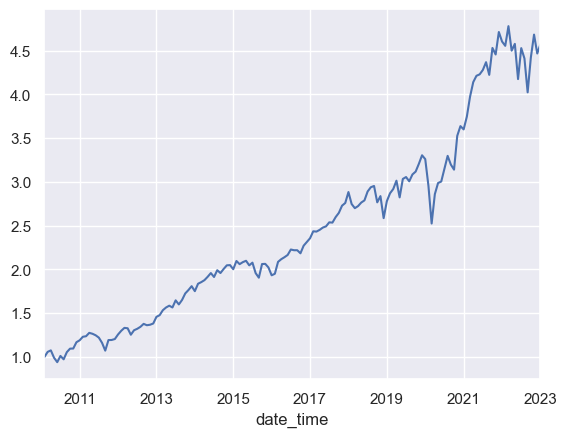

In [9]:
# 횡적 자산배분의 결과 확인
port_val = calculate_portvals(price_df=price_universe, weight_df=beta_weight)
port_val

port_rets = get_daily_rets(port_val)
port_rets

port_cum_rets = get_cum_rets(port_rets)
port_cum_rets.plot()

In [10]:
# TimeSeries의 변수로 들어갈 포트폴리오 리턴을 만든다. 
def port_val(weight_df, rebal_price_df): 
    
    # 포트폴리오 수익률 데이터프레임
    rets = rebal_price_df.pct_change().fillna(0)
    port_rets = weight_df * rets
    port_rets = port_rets.sum(axis=1)
    port_cum_rets = (1 + port_rets).cumprod() - 1
    
    return port_rets

port_rets = port_val(beta_weight, rebal_price_df)
type(port_rets)

pandas.core.series.Series

In [11]:
port_rets

2010-01-31    0.000000
2010-02-28    0.030736
2010-03-31    0.057886
2010-04-30    0.016539
2010-05-31   -0.078265
                ...   
2022-09-30   -0.087861
2022-10-31    0.098918
2022-11-30    0.059185
2022-12-31   -0.046092
2023-01-31    0.023881
Length: 157, dtype: float64

In [12]:
target = 0.5
ts_weight = pd.DataFrame({'PORTFOLIO': target, 'CASH': 1 - target}, index=port_rets.index)
ts_weight

,PORTFOLIO,CASH
2010-01-31,0.5,0.5
2010-02-28,0.5,0.5
2010-03-31,0.5,0.5
2010-04-30,0.5,0.5
2010-05-31,0.5,0.5
...,...,...
2022-09-30,0.5,0.5
2022-10-31,0.5,0.5
2022-11-30,0.5,0.5
2022-12-31,0.5,0.5


In [13]:
# 종적 자산배분 
ew_weights, ew_ew_weight = TimeSeries(port_rets=port_rets, cs_weight=beta_weight, call_method='ew', param=12).run()
vt_weights, ew_vt_weight = TimeSeries(port_rets=port_rets, cs_weight=beta_weight, call_method='vt', param=12).run()
cvt_weights, ew_cvt_weight = TimeSeries(port_rets=port_rets, cs_weight=beta_weight, call_method='cvt', param=12).run()
kl_weights, kl_cvt_weight = TimeSeries(port_rets=port_rets, cs_weight=beta_weight, call_method='kl', param=12).run()
cppi_weights, cppi_cvt_weight = TimeSeries(port_rets=port_rets, cs_weight=beta_weight, call_method='cppi', param=12).run()
# vt_weights = test_ts.vt()
# cvt_weights = test_ts.cvt()
# kl_weights = test_ts.kl()
# cppi_weights = test_ts.cppi()

In [20]:
ew_weights

,PORTFOLIO,CASH
2010-01-31,0.7,0.3
2010-02-28,0.7,0.3
2010-03-31,0.7,0.3
2010-04-30,0.7,0.3
2010-05-31,0.7,0.3
...,...,...
2022-09-30,0.7,0.3
2022-10-31,0.7,0.3
2022-11-30,0.7,0.3
2022-12-31,0.7,0.3


In [14]:
cvt_weights

,PORTFOLIO,CASH
2010-01-31,0.000000,1.000000
2010-02-28,0.000000,1.000000
2010-03-31,0.000000,1.000000
2010-04-30,0.000000,1.000000
2010-05-31,0.000000,1.000000
...,...,...
2022-09-30,0.568917,0.431083
2022-10-31,0.568917,0.431083
2022-11-30,0.568917,0.431083
2022-12-31,0.568917,0.431083


Text(0, 0.5, 'Weights')

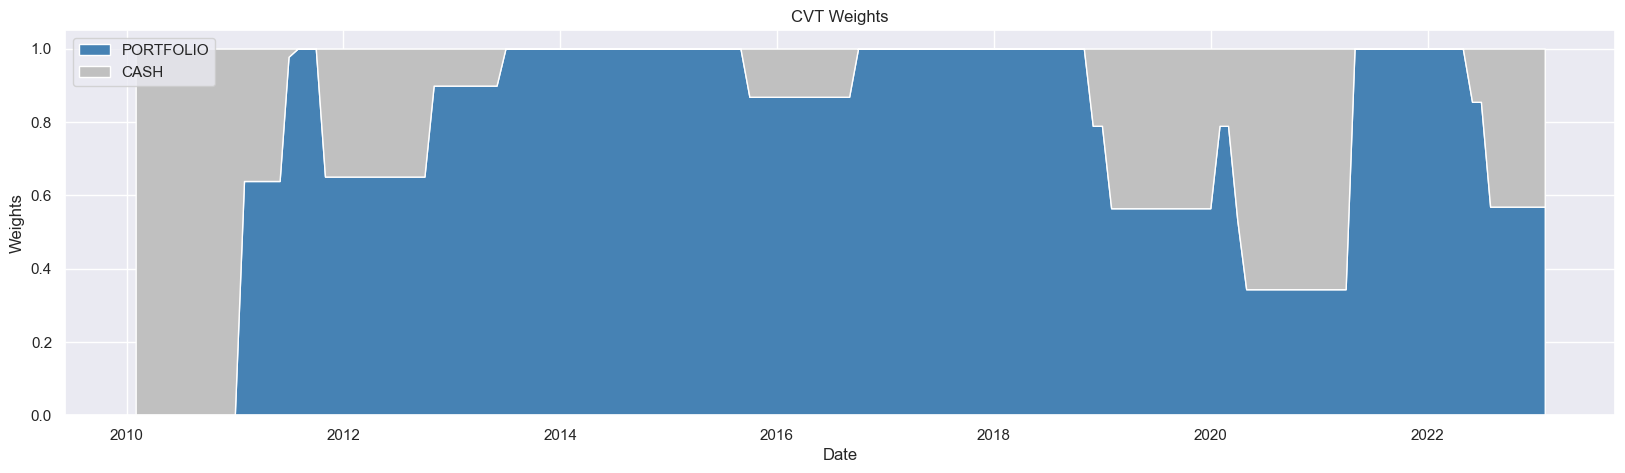

In [15]:
# 시계열 플랏 시각화
plt.figure(figsize=(20, 5))
plt.stackplot(cvt_weights.index, cvt_weights.T, labels=cvt_weights.columns, colors=['steelblue', 'silver'])
plt.legend(loc='upper left')
plt.title('CVT Weights')
plt.xlabel('Date')
plt.ylabel('Weights')

In [16]:
ts_models = {'vt':vt_weights, 
            'cvt':cvt_weights, 
            'kl': kl_weights, 
            'cppi': cppi_weights
            }

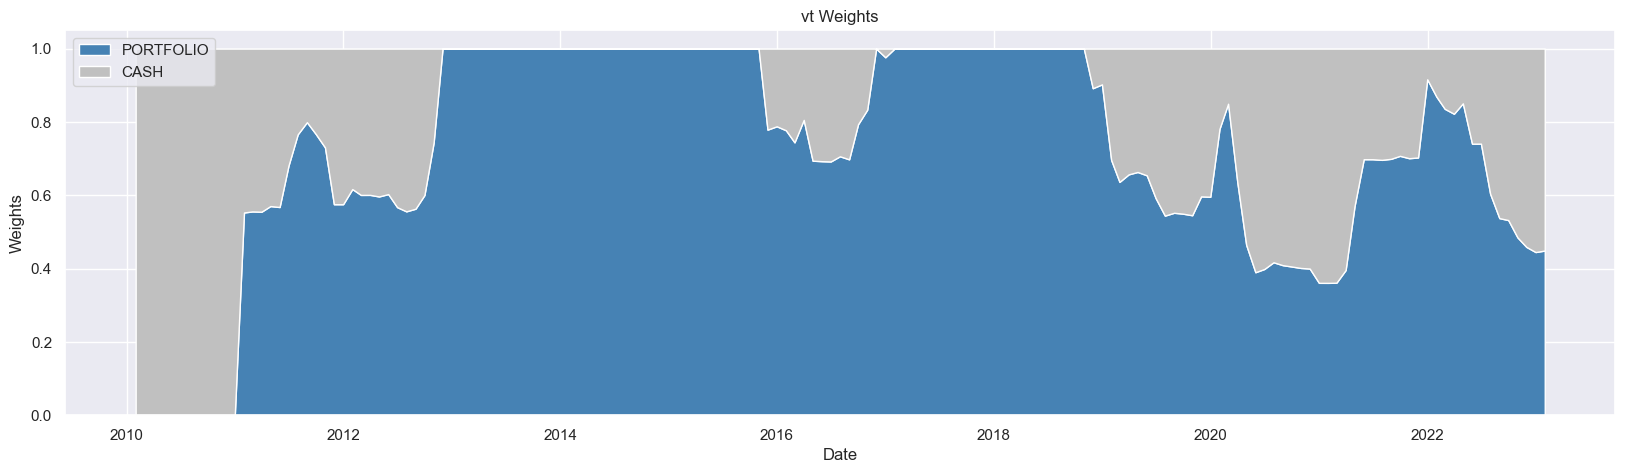

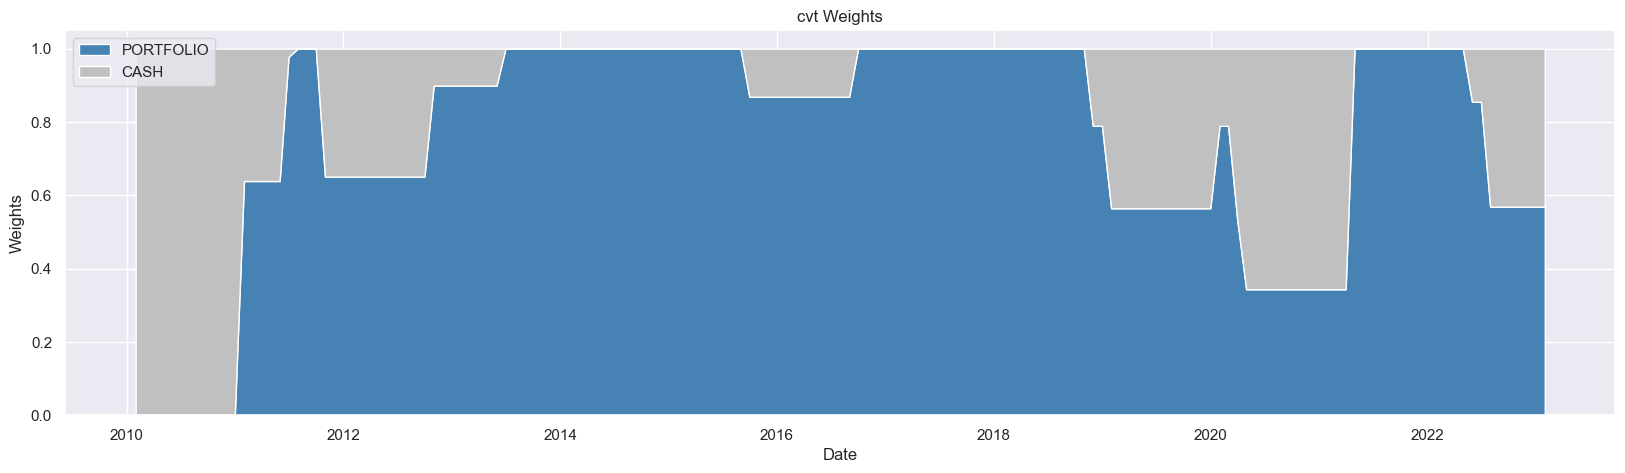

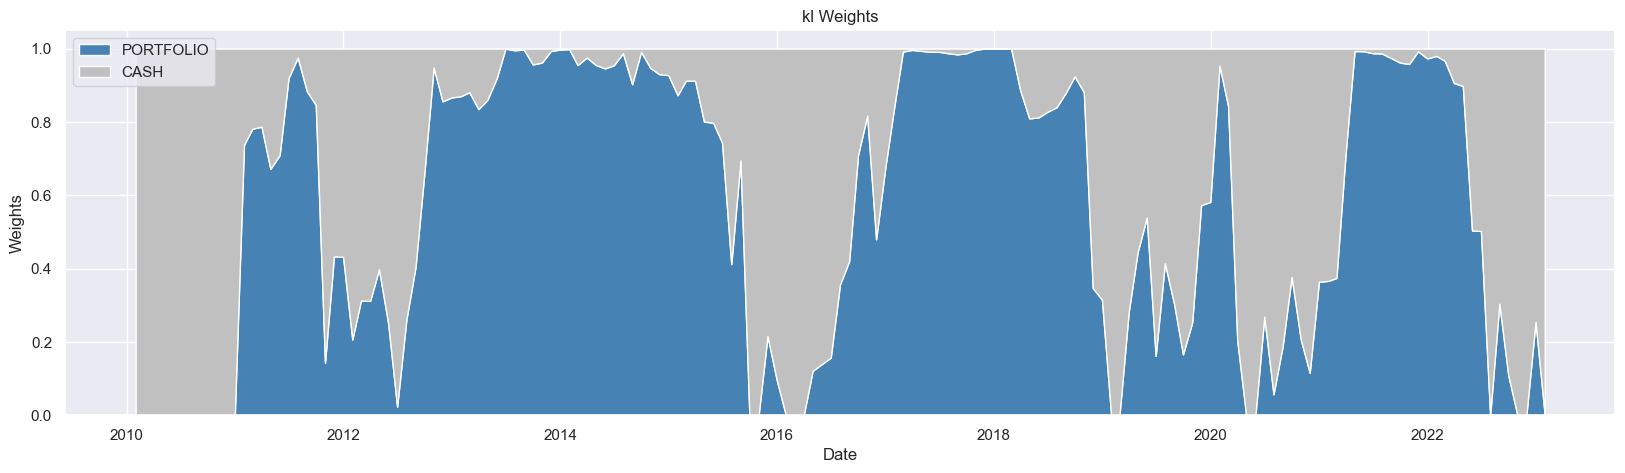

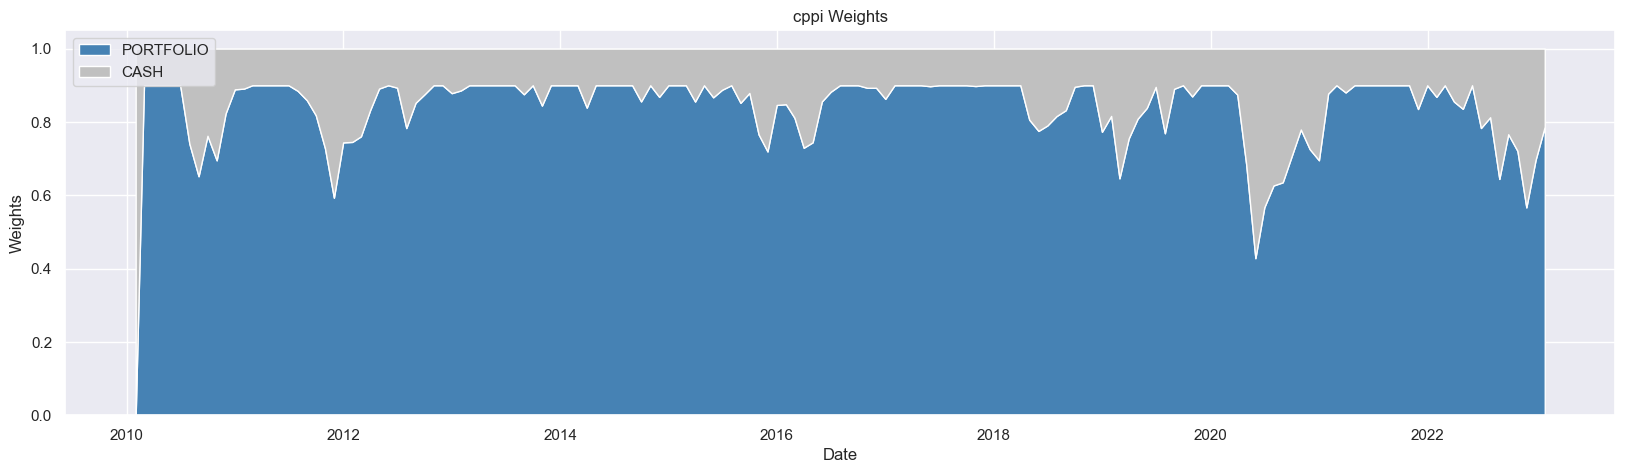

In [17]:
# 시계열 플랏 시각화
def plot_ts_weight(weight_df, name):
    plt.figure(figsize=(20, 5))
    plt.stackplot(weight_df.index, weight_df.T, labels=weight_df.columns, colors=['steelblue', 'silver'])
    plt.legend(loc='upper left')
    plt.title(f'{name} Weights')
    plt.xlabel('Date')
    plt.ylabel('Weights')
    
for name, ts in ts_models.items():
    plot_ts_weight(ts, name)

In [18]:
price_universe = add_cash(price_universe, 252, 0.04)

<AxesSubplot: xlabel='date_time'>

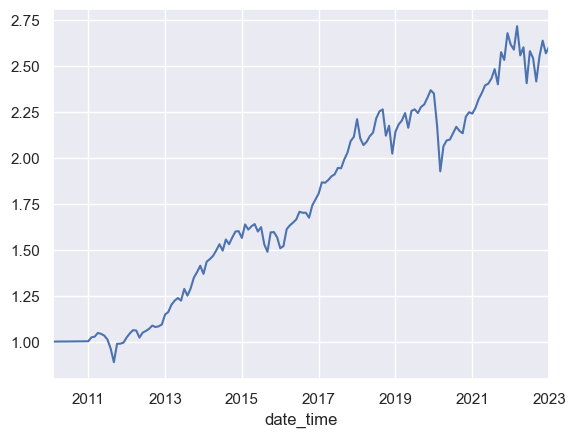

In [19]:
# 종적 자산배분의 결과 확인
port_val = calculate_portvals(price_df=price_universe, weight_df=ew_cvt_weight)
port_val

port_rets = get_daily_rets(port_val)
port_rets

port_cum_rets = get_cum_rets(port_rets)
port_cum_rets.plot()